In [13]:
import os
from os import listdir
from pathlib import Path

from datetime import datetime
import pytz
import pendulum

import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [42]:
df_all = []

columns_to_read = ["DATE_FROM", "DATE_TO", "PRODUCT_TYPE", "TENDER_NUMBER",	"PRODUCTNAME",
                   "GERMANY_DEMAND_[MW]", "GERMANY_SETTLEMENTCAPACITY_PRICE_[EUR/MW]",
                   "GERMANY_DEFICIT(-)_SURPLUS(+)_[MW]"]
data = pl.read_excel("data/RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2023-01-01_2023-12-31.xlsx",
                     columns=columns_to_read).rename({
    "DATE_FROM": "start_date",
    "DATE_TO": "end_date",
    "PRODUCT_TYPE": "product_type",
    "TENDER_NUMBER": "tender_number",
    "PRODUCTNAME": "productname",
    "GERMANY_DEMAND_[MW]": "demand_mw",
    "GERMANY_SETTLEMENTCAPACITY_PRICE_[EUR/MW]": "cap_price",
    "GERMANY_DEFICIT(-)_SURPLUS(+)_[MW]": "surplus_mw",
})

data = data.filter(pl.col("cap_price").is_not_null())

In [43]:
data.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   start_date     2190 non-null   datetime64[ms]
 1   end_date       2190 non-null   datetime64[ms]
 2   product_type   2190 non-null   object        
 3   tender_number  2190 non-null   int64         
 4   productname    2190 non-null   object        
 5   demand_mw      2190 non-null   int64         
 6   cap_price      2190 non-null   float64       
 7   surplus_mw     2190 non-null   int64         
dtypes: datetime64[ms](2), float64(1), int64(3), object(2)
memory usage: 137.0+ KB


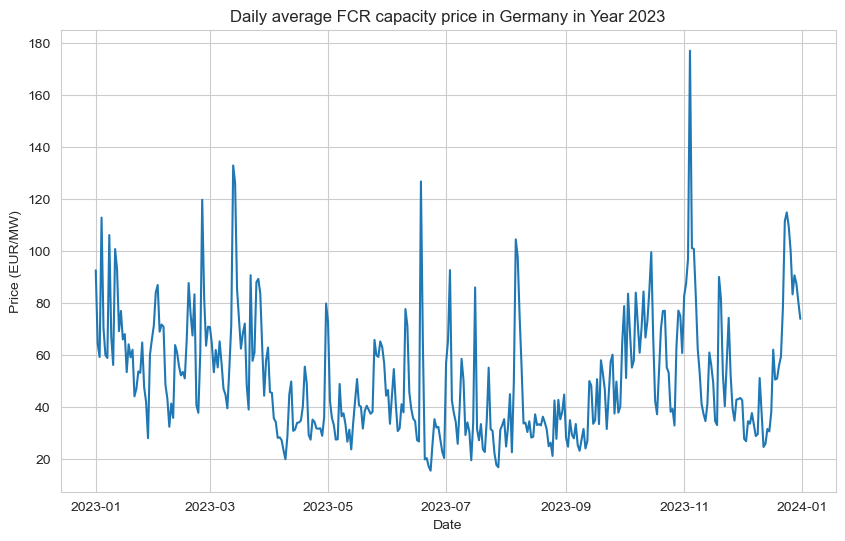

In [56]:
plot_df = data.group_by("start_date").agg(
    pl.col("cap_price").mean().alias("average_price"),
).sort("start_date")

plt.figure(figsize=(10, 6))
plt.plot(plot_df.select("start_date"), plot_df.select("average_price"))
plt.title("Daily average FCR capacity price in Germany in Year 2023")
plt.xlabel("Date")
plt.ylabel("Price (EUR/MW)")
plt.show()

In [57]:
data.select("cap_price").sum()

cap_price
f64
111975.31


In [ ]:
# 111.98 kEUR/MW/year